## Observations and Insights 

In [5]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how = "inner", on = "Mouse ID")
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice_total = combined_data_df["Mouse ID"].count()
mice_total

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
all_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_total = clean_df['Mouse ID'].count()
mice_total

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for
#each regimen

mean = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM" : sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
pd_summary_stat = pd.DataFrame({"Mean": mean,
                                "Median": median,
                                "Variance": variance,
                                "Standard Deviation": standard_dev,
                                "SEM": sem})
pd_summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#panda code for bar graph x drug, y is number of measurments
drug_types = pd.DataFrame(combined_data_df.groupby(['Drug Regimen']).count()).reset_index()

#How to display
drugs_df = drug_types[['Drug Regimen', 'Mouse ID']]
drugs_df = drugs_df.set_index('Drug Regimen')
sortdrugs = drugs_df.sort_values(by='Mouse ID', ascending=False)

sortdrugs

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


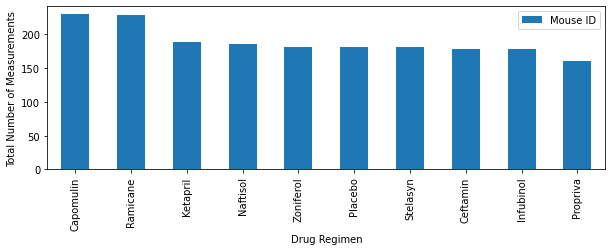

<Figure size 432x288 with 0 Axes>

In [11]:
#Creating the bar chart
sortdrugs.plot(kind='bar', figsize=(10,3))

plt.ylabel('Total Number of Measurements')
plt.show()
plt.tight_layout()


In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list = summary_stats_df.index.tolist()
#drug_count = drug_list.sort_values(by='Mouse ID', ascending=False)
drug_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [23]:
drug_count = (combined_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [24]:
x_axis = np.arange(len(drug_count))

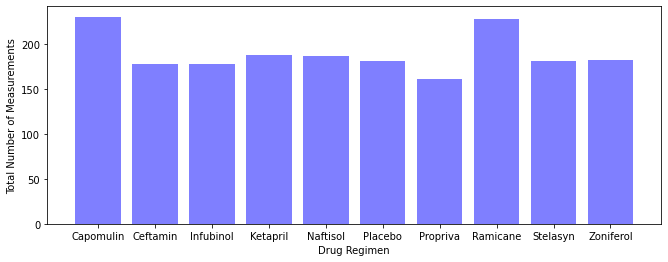

In [31]:
x_axis = drug_list

#Format bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()

In [27]:
#Narrow down the dataframe to two columns
gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


<AxesSubplot:ylabel='Mouse ID'>

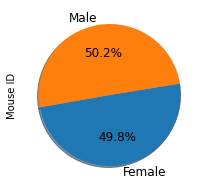

In [32]:
# Generate a pie plot

ax1 = plt.subplot(121,aspect='equal')
gender_df.plot(kind='pie', y = "Mouse ID", figsize= (7,7), ax=ax1, autopct='%1.1f%%',
    startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=12)


In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_df.groupby(['Sex'])['Age_months'].count()).tolist()
gender_count

[124, 125]

In [34]:
labels = ["Female", "Male"]
colors = ["Blue", "Orange"]


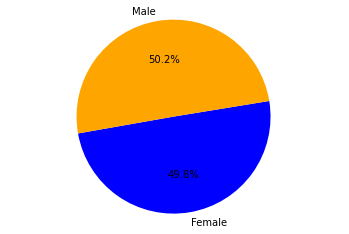

In [35]:
#Building the pie plot
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=190)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#one column dataframe
greatest = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = clean_df.merge(greatest,on=["Mouse ID", "Timepoint"],how="left")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
  # Locate the rows which contain mice on each drug and get the tumor volumes
  # add subset
treatments = ["Capomulin", "Ramican", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data =[]

for name in treatments:
    final_vol = merge_df.loc[merge_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]
    tumor_data.append(final_vol)
    #print(f"{name}'s final volume: {tumor_data}")

    # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    #potential outliers: {outliers}")
    outliers
    
    #print(f"The {name}'s potential outliers : {outliers}")
    
    #print(f"Values above {upper_bound} could be outliers.")


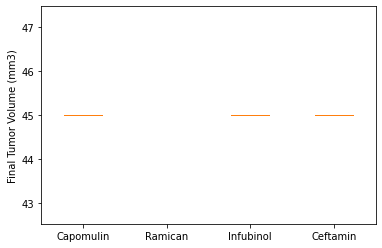

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interestboxplot(tumor_data,labels=treatments,flierprops={'markerfacecolor':'red','markersize':7})
##look at this line to fix boxplot bplot1 = ax1.boxplot(tumor_data, vert = True, labels=labels)
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_data,labels=treatments,flierprops={'markerfacecolor':'red','markersize':7})
plt.ylabel("Final Tumor Volume (mm3)")
#plt.labels({treatments})
plt.show()

## Line and Scatter Plots

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "l509"]
line_plot_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


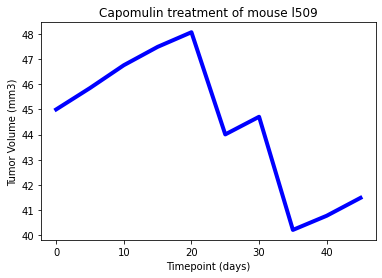

In [85]:
x_axis_tp = line_plot_df["Timepoint"]
tum_vol = line_plot_df["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tum_vol, color = 'blue', linewidth = 4)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
